In [1]:
import sys
sys.executable

'C:\\Users\\Andres\\flight-fare-optimizer\\.venv\\Scripts\\python.exe'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load flights dataset
df = pd.read_csv('../data/raw/airlines_flights_data.csv')

# Preview the data
print(df.shape)
df.head()

(300153, 12)


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# View shape and column names
print("Rows, columns:", df.shape)
print("Columns:\n", df.columns)

Rows, columns: (300153, 12)
Columns:
 Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')


In [4]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
# Check missing values
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
# Drop the 'index' column
df = df.drop(columns=['index'])

In [7]:
# Check again
print("Rows, columns:", df.shape)
print("Columns:\n", df.columns)
df.info()
df.isnull().sum()

Rows, columns: (300153, 11)
Columns:
 Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
m

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
cat_cols = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

In [10]:
for col in cat_cols:
    print(f"\n {col}")
    print(df[col].value_counts())


 airline
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

 flight
flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-2914       1
G8-107        1
SG-9974       1
6E-865        1
SG-8339       1
Name: count, Length: 1561, dtype: int64

 source_city
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

 departure_time
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

 stops
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

 arrival_time
arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning   

In [11]:
# Summary stats
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


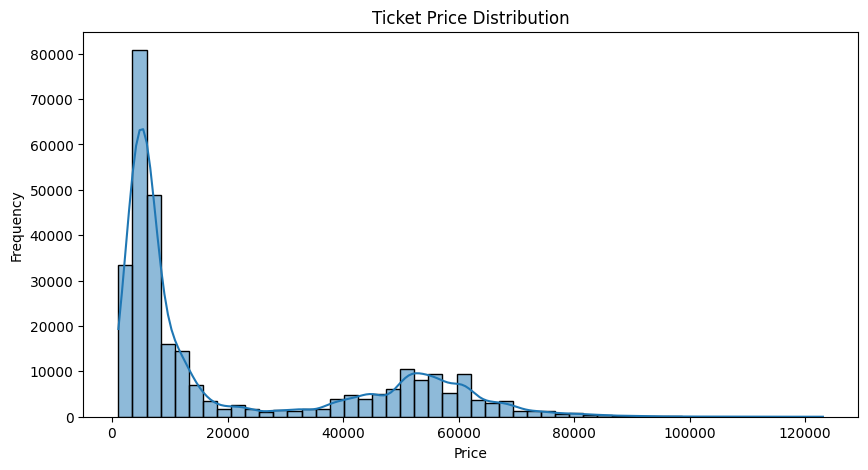

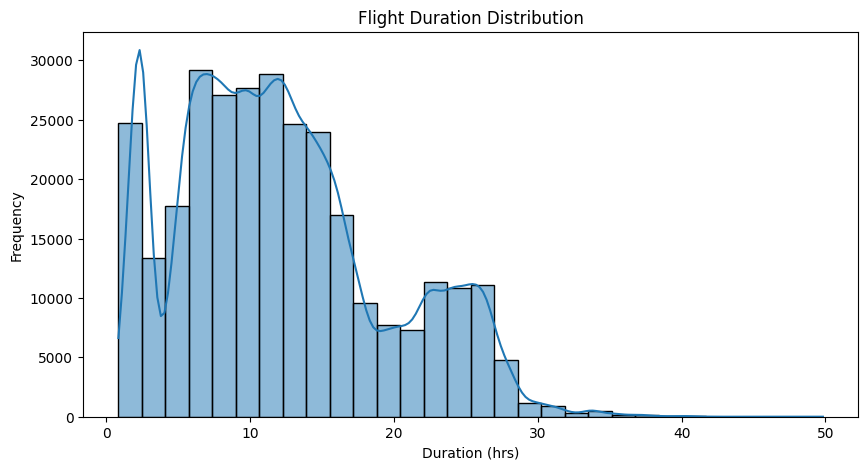

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Ticket Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['duration'], kde=True, bins=30)
plt.title('Flight Duration Distribution')
plt.xlabel('Duration (hrs)')
plt.ylabel('Frequency')
plt.show()

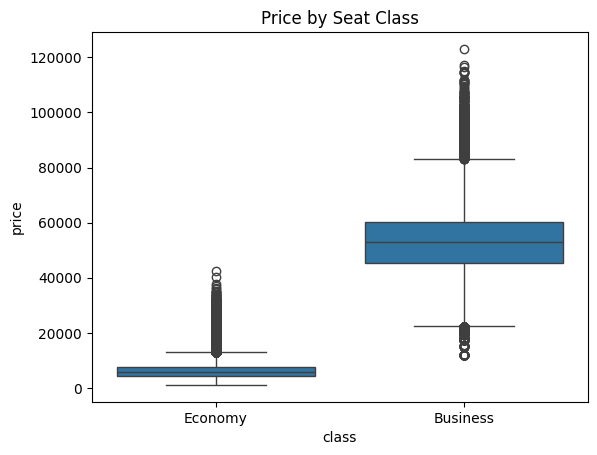

In [13]:
# Price by class
sns.boxplot(x='class', y='price', data=df)
plt.title('Price by Seat Class')
plt.show()

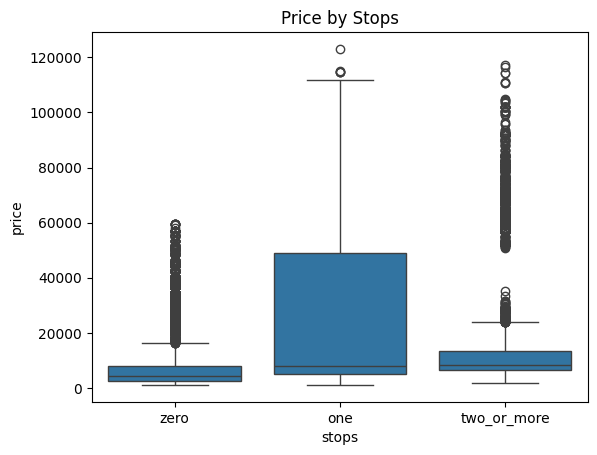

In [14]:
# Price by number of stops
sns.boxplot(x='stops', y='price', data=df)
plt.title('Price by Stops')
plt.show()

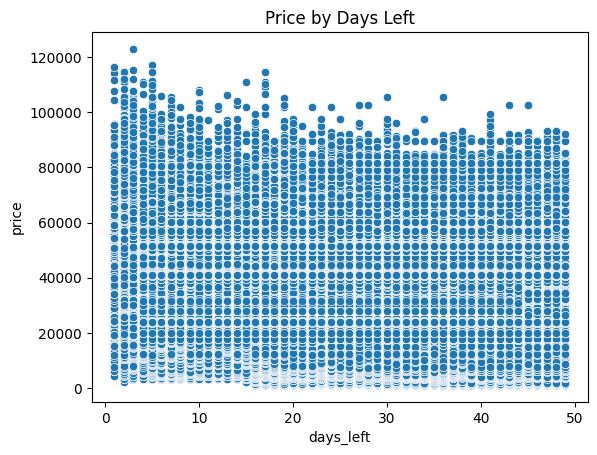

In [15]:
# Price vs Days Left
sns.scatterplot(x='days_left', y='price', data=df)
plt.title('Price by Days Left')
plt.show()

In [16]:
import sys
import os

# Add the root of the project to Python's path # “Hey Python, include the parent folder (your project root) when searching for modules.”
sys.path.append(os.path.abspath(".."))

# Step 1: Filter options
from src.data_prep import filter_flights

In [17]:
test = filter_flights(
    df,
    source="Delhi",
    destination="Mumbai",
    max_stops=1,
    seat_class="Economy",
    preferred_departure="Morning",
    max_duration=10,
    max_price=8000
)
test.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
1,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
2,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
3,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
4,GO_FIRST,G8-338,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5954


In [18]:
# Step 2: Run the optimizer
from src.optimizer import find_cheapest_itinerary

optimal_flights, total_cost = find_cheapest_itinerary(test)

#Step 3: Display result
print("Total Cost:", total_cost)
optimal_flights

Total Cost: 2281


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8723,Delhi,Morning,zero,Morning,Mumbai,Economy,2.17,47,2281
